# Lista de Exercícios #08 

---
**Disciplina:** PMT07 – Transferência de Calor e Mecânica dos Fluidos Computacional 

**Aluno:** Abner Vieira Pereira

In [2]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from IPython.display import Image, Math

## Enunciado

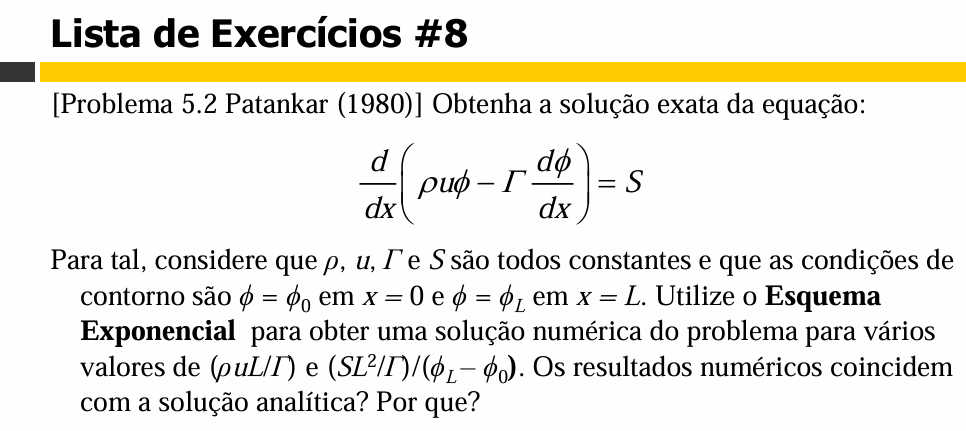

In [3]:
Image('enun_L8.png',width=600)

Primeiramente, será proposta uma verificação da resolução analítica desenvolvida anteriormente utilizando a biblioteca simbólica do *python*: Sympy.

In [4]:
x, rho, u, gamma, S, phi_0, phi_L, L = sy.symbols('x rho u Gamma S phi_0 phi_L L')
phi = sy.Function('phi')(x)

In [5]:
eq_gov = sy.Eq(((rho * u) * sy.diff(phi,x,1)) - gamma * sy.diff(phi,x,2), S)
eq_gov

Eq(-Gamma*Derivative(phi(x), (x, 2)) + rho*u*Derivative(phi(x), x), S)

In [6]:
phi_sol = sy.dsolve(eq_gov, phi)
phi_sol

Eq(phi(x), C1 + C2*exp(rho*u*x/Gamma) + S*x/(rho*u))

In [7]:
phi_expr = phi_sol.rhs

In [8]:
C1, C2 = sy.symbols('C1 C2')

cond1 = sy.Eq(phi_expr.subs(x,0), phi_0)
cond2 = sy.Eq(phi_expr.subs(x, L),phi_L)

display(Math(r'\text{Condição 1 (em } x=0\text{)}: \quad ' + sy.latex(cond1)))
display(Math(r'\text{Condição 2 (em } x=L\text{)}: \quad ' + sy.latex(cond2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
constantes = sy.solve([cond1, cond2], [C1, C2])
display(Math(r'\textbf{Constantes determinadas:}'))
for const, valor in constantes.items():
    display(Math(sy.latex(const) + r' = ' + sy.latex(valor)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
phi_particular = phi_expr.subs(constantes)
display(Math(r'\textbf{Solução Particular:}'))
display(Math(r'\phi(x) = ' + sy.latex(phi_particular)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
phi_simplificada = sy.simplify(phi_particular)
display(Math(r'\textbf{Solução Simplificada:}'))
display(Math(r'\phi(x) = ' + sy.latex(phi_simplificada)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
params = {
    rho: 1.0,
    gamma: 1, 
    L: 1,
    u: 1.0,
    S:0,
    phi_0: 0,
    phi_L: 1,
}

In [13]:
# Cálculo de Peclet

pe = (rho * u * L)/gamma
pe

L*rho*u/Gamma

In [14]:
pe.subs(params)

1.00000000000000

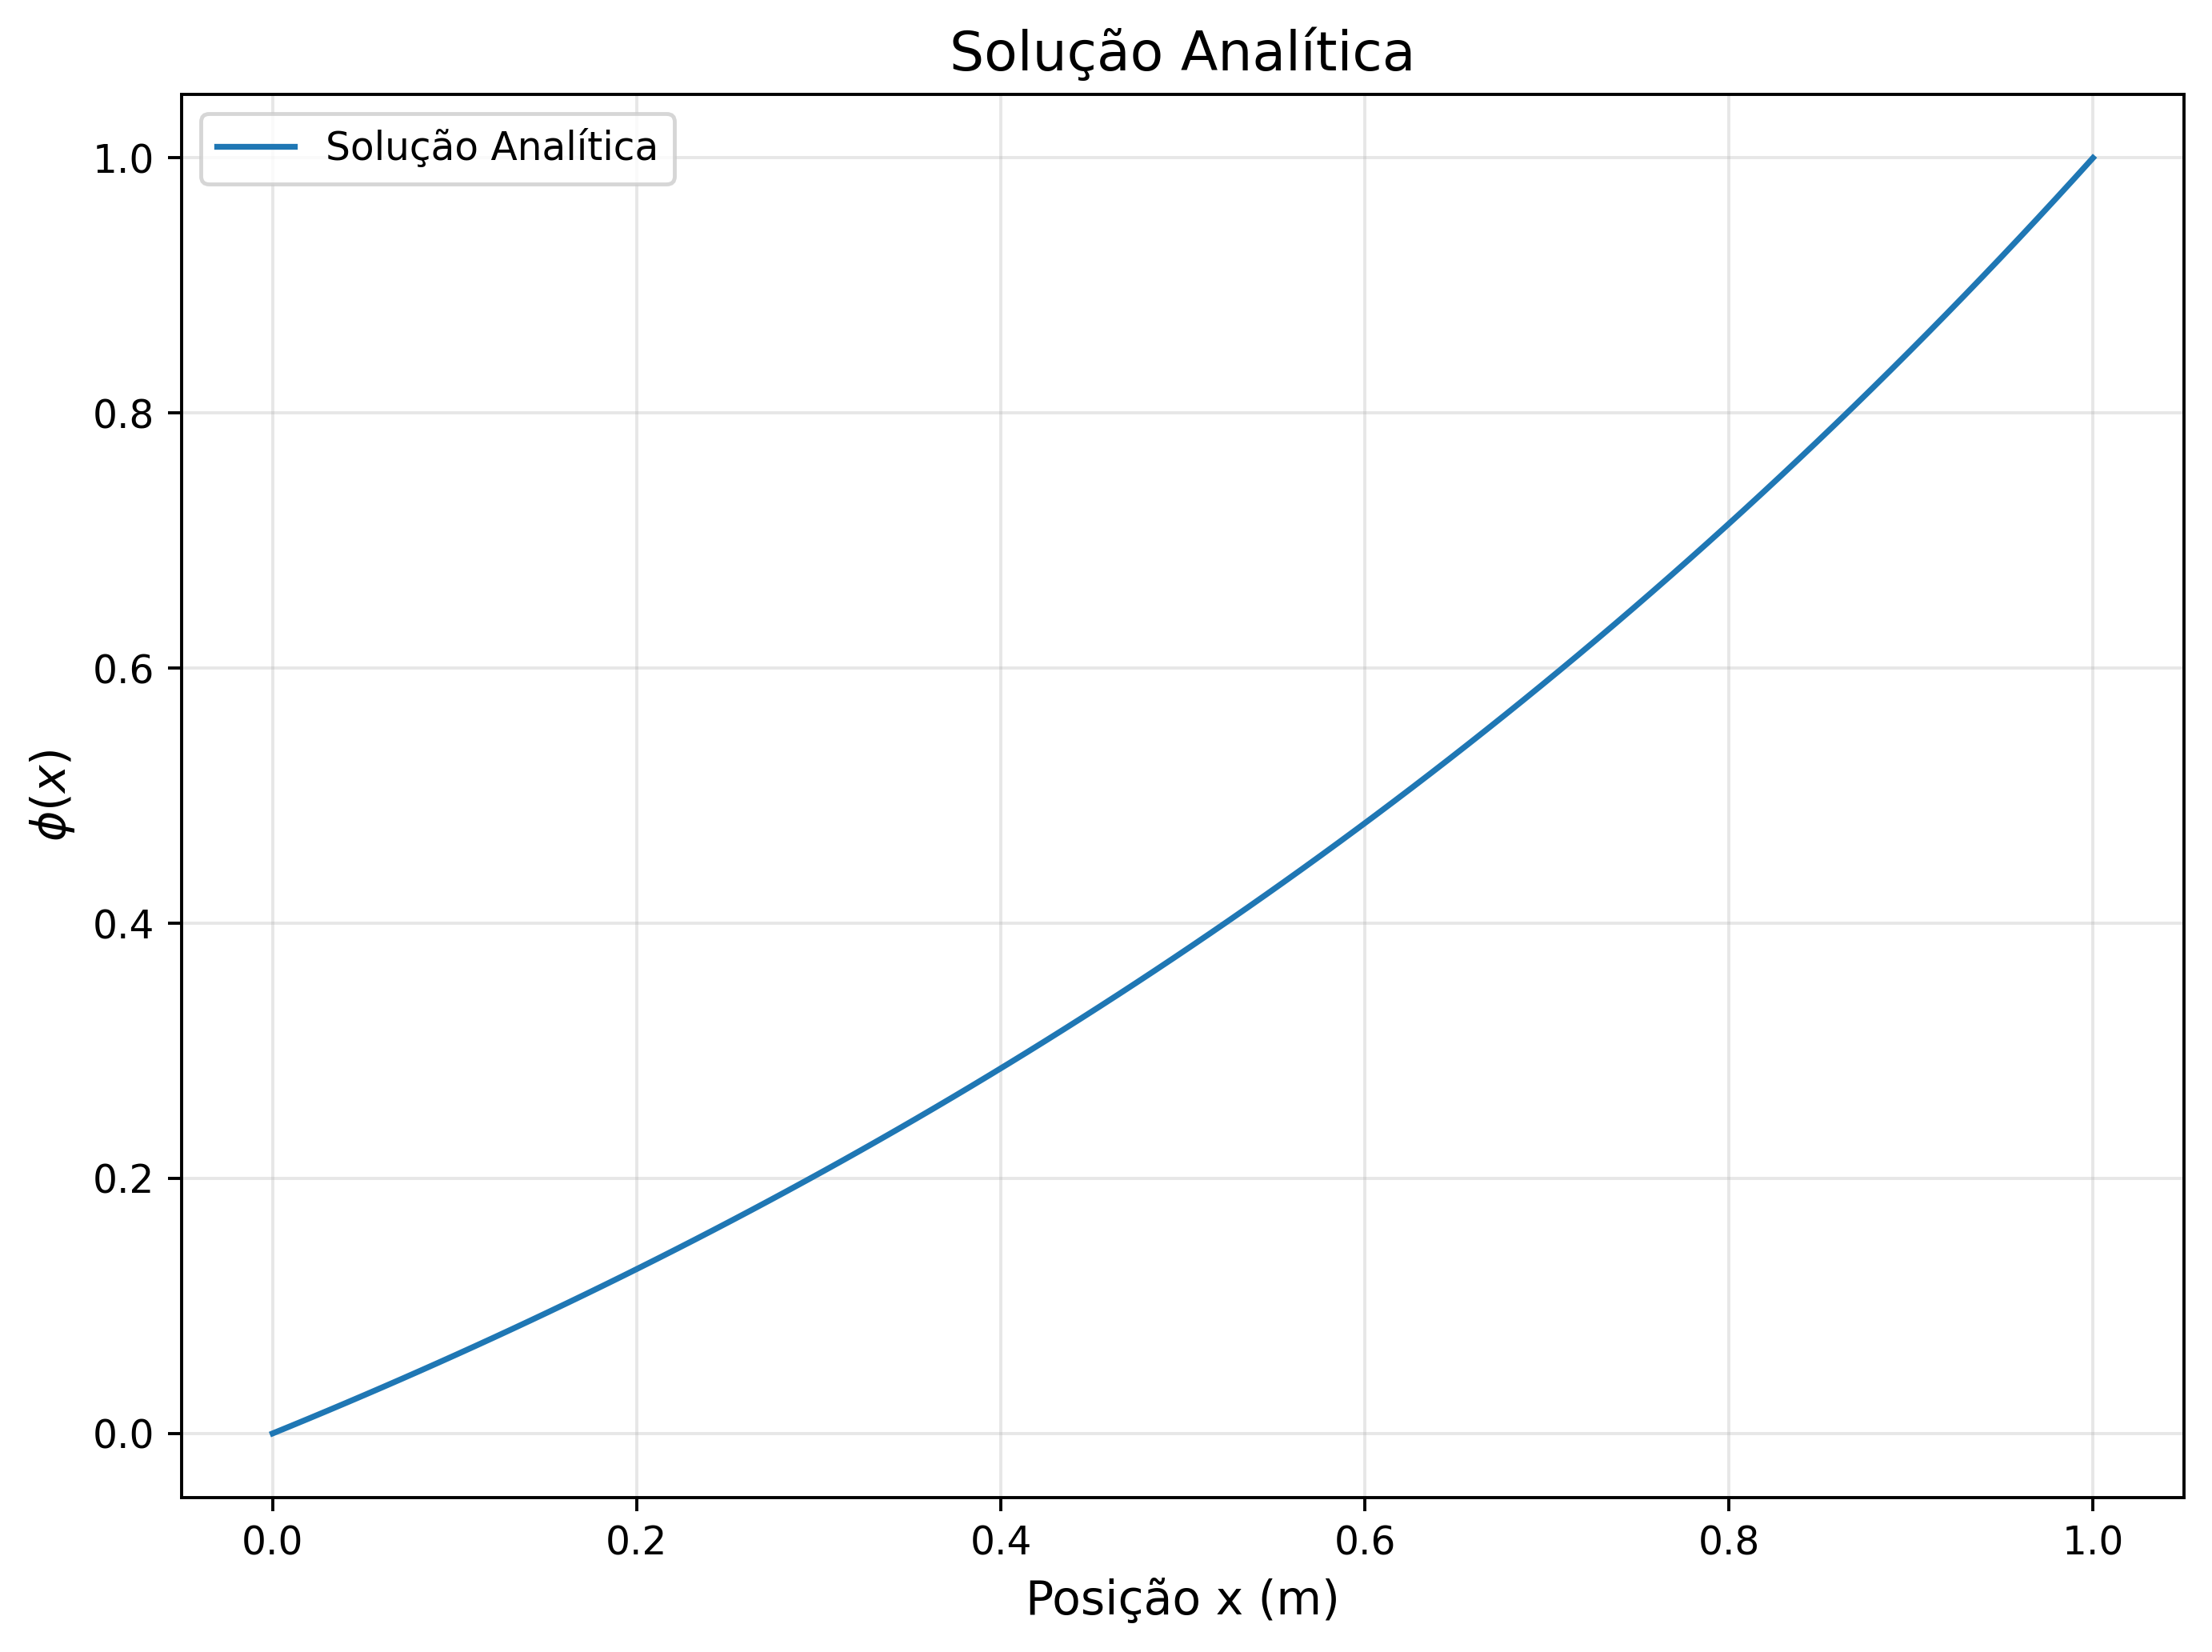

In [15]:
phi_num = sy.lambdify(x, phi_simplificada.subs(params), 'numpy')
x_plot = np.linspace(0, 1, 100)
phi_plot = phi_num(x_plot)

# Plotando o gráfico
plt.figure(figsize=(8, 6), dpi=350)
plt.plot(x_plot, phi_plot, linewidth=1.5, label='Solução Analítica')
plt.title('Solução Analítica', fontsize=14)
plt.xlabel('Posição x (m)', fontsize=12)
plt.ylabel(r'$\phi(x)$', fontsize=12)  # ou 'Temperatura (°C)' se for temperatura
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Método Numérico

### Discretização da equação governante

A equação diferencial que governa o transporte de uma propriedade escalar $(\phi)$ em regime permanente, considerando uma situação de convecção-difusão 1D com termo fonte é:

$$\frac{d}{dx} (\rho u \phi) = \frac{d}{dx}\left(\Gamma \frac{d \phi}{dx}\right) + S$$

Integrando a equação sobre um volume genérico de largura $\Delta x$ centrado no nó P:

$$\int_{VC} \left[\frac{d}{dx}(ρu\phi)\right] dx = \int_{VC} \left[\frac{d}{dx}\left(\Gamma \frac{d \phi}{dx}\right)\right] dx + \int_{VC} S dx$$

Pelo Teorema da Divergência, obtem-se o balanço de fluxos nas faces:

$$(ρu\phi)_e - (ρu\phi)_w = \left(Γ \frac{d\phi}{dx}\right)_e - \left(Γ \frac{d\phi}{dx}\right)_w + \overline{S} Δx$$

$$(ρu\phi)_e - \left(Γ \frac{d\phi}{dx}\right)_e = (ρu\phi)_w - \left(Γ \frac{d\phi}{dx}\right)_w  + \overline{S} Δx $$

Reescrevendo em termos do fluxo total $J = ρu\phi - Γ \frac{d\phi}{dx}$:

$$J_e - J_w = \overline{S} Δx$$

A Equação da Continuidade pode ser escrita como:

$$\frac{d}{dx}(\rho \, u) = 0$$

Integrando a Equação da Continuidade:

$$F_e - F_w = 0$$

Onde $F = \rho \, u$.

Multiplicando a equação da continuidade por $\phi_P$ e subtraindo da forma discreta da Equação Geral, tem-se:

$$(J_e - F_e\phi_P) - (J_w - F_w\phi_P) = S  \Delta x \phi_P$$

Substituindo, nos termos $(J - F \phi)$, as relações obtidas na formulação generalizada, obtém-se que:

$$a_P \phi_P = a_E \phi_E + a_W\phi_W + b$$


Onde, ao se utilizar a formulação geral tem-se:

|Coeficiente|Expressão|
| --- | --- |
| $a_E$ | $D_e A(\|P_e\|)+(\|\| -F_e, 0 \|\|)$|
| $a_W$ | $D_w A(\|P_w\|)+(\|\| F_w, 0 \|\|)$|
| $a_P$ | $a_E + a_W $|
| $b$ | $S_C \Delta x$|

Ressaltando que $D = \frac{Γ}{Δx}$ é a condutância difusiva, $D = \frac{Γ}{Δx}$ é o número de Péclet e que levando em consideração o esquema exponencial $A(Pe) = \frac{Pe}{(e^{Pe} - 1)}$.

Essa formulação é válida para todos os **nós centrais** tratados na solução deste exercício. Os nós de fronteira (primeiro e penúltimo nós) apresentam uma formulação um pouco diferente, como será abordado a seguir.


### Dedução para o primeiro nó de fronteira (nó 1)

Considerando o primeiro nó de fronteira localizado em $x_1 = \Delta x / 2$, seu volume de controle se estende de $x_w = 0$ (face oeste, que é a fronteira) até $x_e = \Delta x$ (face leste).

#### Fluxo na face oeste $(J_w)$ - Fronteira

A face oeste do volume de controle do nó 1 está em x = 0, onde a condição de contorno $\phi = \phi_0$ é aplicada e a distância entre o nó de contorno 0 e o nó 1 é $\Delta x/2$. Portanto, para esta face:

**- Condutância Difusiva $(D_w)$**: $D_w = \frac{\Gamma}{\Delta x/2} = 2\frac{\Gamma}{\Delta x}$

**- Fluxo Convectivo $(F_w)$**: $F_w = \rho \, u$

**- Número de Péclet $(P_w)$**: $P_w = \frac{F_w}{D_w} = \frac{\rho \, u \, \Delta x}{2 \Gamma}$

O coeficiente $a_W$ para esta face é dado por:

$$a_W = D_w A(|P_w|)+(\| F_w, 0 \|)$$

Entretanto, como $\phi_0$ é um valor conhecido, o termo $a_W \phi_0$ é tratado como parte do termo fonte b no lado direito da equação algébrica.

#### Fluxo na face leste $(J_e)$ - Interna
A face leste do volume de controle do nó 1 está em $x = \Delta x$, entre o nó 1 e o nó 2, e a distância entre o nó 1 e o nó 2 é $\Delta x$. Portanto, para esta face:

**- Condutância Difusiva $(D_e)$**: $D_e = \frac{\Gamma}{\Delta x}$

**- Fluxo Convectivo $(F_e)$**: $F_e = \rho \, u$

**- Número de Péclet $(P_e)$**: $P_e = \frac{F_w}{D_w} = \frac{\rho \, u \, \Delta x}{\Gamma}$


O coeficiente $a_E$ para esta face é dado por:

$$a_E = D_e A(|P_e|)+(\| -F_e, 0 \|)$$

#### Coeficientes $a_P$ e $b$ para o nó 1

A queação discretizada para o nó 1 apresenta a seguinte forma:

$$a_P \phi_P = a_E \phi_E + b$$

**- Coeficiente a_P**: É dado por: $a_P = a_E + a_W + (F_e - F_w)$, mas, como $F_e = F_w = \rho u$, o termo $(F_e - F_w)$ se anula. Portando $a_P = a_E + a_W$

**- Termo Fonte b**: Inclui o termo fonte original e a contribuição da condição de contorno: $b = S \Delta x + a_W \phi_0$

### Dedução para o penúltimo nó (último de fronteira)

Considerando o último nó interno localizado em $x_{[n - 2]} = L - \Delta x/2$, onde $L$ é o comprimento total do domínio físico sob análise. O volume de controle desse nó se estende de $x_w = L - \Delta x$ (face oeste, entre o antepenúltimo nó e o penúltimo nó) até $x_e = L$ (face leste, que é a fronteira).

#### Fluxo na face oeste $(J_w)$ - Interna

A face oeste do volume de controle do penúltimo nó está em $x = L - \Delta x$, assim:

**- Condutância Difusiva $(D_w)$**: $D_w = \frac{\Gamma}{\Delta x} $

**- Fluxo Convectivo $(F_w)$**: $F_w = \rho \, u$

**- Número de Péclet $(P_w)$**: $P_w = \frac{F_w}{D_w} = \frac{\rho \, u \, \Delta x}{\Gamma}$

O coeficiente $a_W$ para esta fave é dado por:

$$a_W = D_w A(|P_w|)+(\| F_w, 0 \|)$$

#### Fluxo na face leste $(J_e)$ - Fronteira

A face leste do volume de controle do penúltimo nó está em $x = L$, onde há um condição de contorno, que é $\phi - \phi_L$. A distância entre o penúltimo nó e o nó de contorne é de $\Delta x / 2$. Logo, para esta face, tem-se: 

**- Condutância Difusiva $(D_e)$**: $D_e = \frac{\Gamma}{\Delta x/2} = 2\frac{\Gamma}{\Delta x}$

**- Fluxo Convectivo $(F_e)$**: $F_e = \rho \, u$

**- Número de Péclet $(P_e)$**: $P_e = \frac{F_e}{D_e} = \frac{\rho \, u \, \Delta x}{2 \Gamma}$

O coeficiente $a_W$ para esta face é dado por:

$$a_E = D_e A(|P_e|)+(\| - F_e, 0 \|)$$

Entretanto, como $\phi_L$ é um valor conhecido, o termo $a_W \phi_L$ é tratado como parte do termo fonte b no lado direito da equação algébrica.

#### Coeficientes $a_P$ e $b$ para o penúltimo nó

**- Coeficiente $a_P$**: $a_P = a_E + a_W$

**- Termo Fonte b**: $b = S \Delta x + a_E \phi_L$

In [16]:
# Constantes do problema
rho_num = 1.0
gamma_num = 1.0 
La = 1.0
u_num = 1.0
S_num = 0
phi_0_num = 0
phi_L_num = 1

In [17]:
nv = 8
n_nos = nv + 2
deltax = La / nv

array([0.    , 0.0625, 0.1875, 0.3125, 0.4375, 0.5625, 0.6875, 0.8125,
       0.9375, 1.    ])

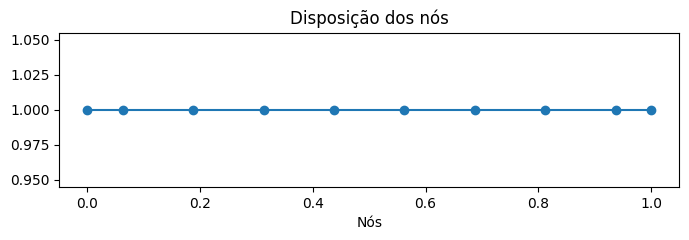

In [18]:
x_nodes = np.zeros(n_nos)
x_nodes[0] = 0
x_nodes[1] = deltax/2
for i in range(2, n_nos-2):
    x_nodes[i] = (deltax/2) + (i-1)*deltax

x_nodes[n_nos - 2] = (La - deltax/2)
x_nodes[n_nos - 1] = La

x_uns = np.ones(n_nos)
plt.figure(figsize=(8, 2))
plt.plot(x_nodes, x_uns, 'o-')
plt.xlabel('Nós')
plt.title('Disposição dos nós')
x_nodes

In [19]:
phi_num = np.zeros(n_nos)
phi_num[0] = phi_0_num
phi_num[n_nos - 1] = phi_L_num

phi_num

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [20]:
F_num = rho_num * u_num
D_num = gamma_num / deltax
Pe_num = F_num / D_num
Pe_num

0.125

In [21]:
def A(Pe_val):
    Pe_abs = abs(Pe_val)
    if Pe_abs < 1e-10:  
        return 1.0
    return Pe_abs / (np.exp(Pe_abs) - 1)

In [22]:
# Vetores com os coeficientes
ae = np.zeros(n_nos)
aw = np.zeros(n_nos)
ap = np.zeros(n_nos)
b = np.zeros(n_nos)

aE_int = (D_num * A(Pe_num)) + (max(-F_num,0))
aW_int = (D_num * A(Pe_num)) + (max(F_num,0))
aP_int = aE_int + aW_int
b_val = S_num * deltax

# Primeiro nó de fronteira (i=1)
D_w_cont = gamma_num / (deltax / 2)
Pe_w_cont = F_num / D_w_cont
aW_cont = (D_w_cont * (A(abs(Pe_w_cont))) + (max(F_num,0)))
ae[1], aw[1] = aE_int, 0
ap[1] = aE_int + aW_cont
b[1] = b_val + aW_cont * phi_0_num

# Nós centrais (i=2 até n_nos-3)
for i in range(2, n_nos - 2):
    ae[i], aw[i], ap[i], b[i] = aE_int, aW_int, aP_int, b_val

# Último nó de fronteira (i=n_nos-2)
D_e_cont = gamma_num / (deltax / 2) 
Pe_e_cont = F_num / D_e_cont
aE_cont = (D_e_cont * A(abs(Pe_e_cont))) + (max(-F_num,0))
aw[n_nos - 2], ae[n_nos - 2] = aW_int, 0
ap[n_nos - 2] = aW_int + aE_cont
b[n_nos - 2] = b_val + aE_cont * phi_L_num

In [23]:
# Criando os vetores da matriz TDMA
a = ap.copy()
b_coef = ae.copy()  
c = aw.copy()
d = b.copy()       
Q = np.zeros(n_nos)
P = np.zeros(n_nos)

# Inicialização do algoritmo TDMA

# Primeiro nó interno
P[1] = b_coef[1] / a[1]  
Q[1] = d[1] / a[1]

# Varredura progressiva
for i in range(2, n_nos-1):
    denom = a[i] - c[i] * P[i-1]
    P[i] = b_coef[i] / denom  
    Q[i] = (d[i] + c[i] * Q[i-1]) / denom

# Retrosubstituição
phi_num[n_nos - 2] = Q[n_nos - 2]

for i in range(n_nos - 3, 0, -1):   
    phi_num[i] = P[i] * phi_num[i+1] + Q[i]

phi_num

array([0.        , 0.03753427, 0.1200212 , 0.21349114, 0.31940645,
       0.43942422, 0.57542218, 0.72952805, 0.90415288, 1.        ])

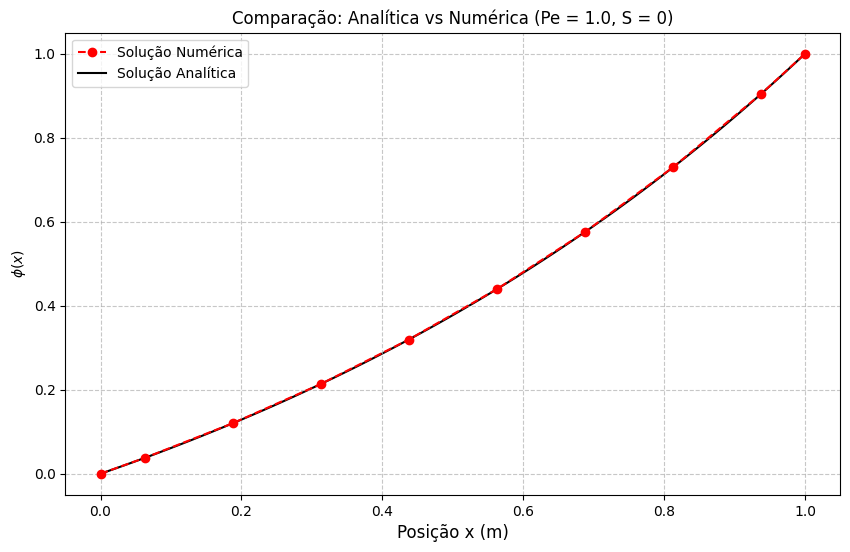

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x_nodes, phi_num, 'o--',color= 'red',label='Solução Numérica',zorder=2)
plt.plot(x_plot, phi_plot, '-', color = 'black', label='Solução Analítica', zorder=1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel(r'$\phi(x)$')
plt.xlabel('Posição x (m)', fontsize=12)
plt.title(f'Comparação: Analítica vs Numérica (Pe = {pe.subs(params):.1f}, S = {S.subs(params)})')
plt.show()

---

Uma vez demonstrada a metodologia empregada para a obtenção das soluções analítica e numérica, optou-se pela implementação de uma classe que reúne os procedimentos previamente apresentados. Essa abordagem visa facilitar a simulação de diferentes casos de estudo, promovendo maior organização do código, reutilização das rotinas desenvolvidas e eficiência na análise dos resultados.

In [25]:
class L8_Solver:
    
    def __init__(self, rho=1.0, gamma=1.0, u=1.0, L=1.0, S=0.0, phi_0=0.0, phi_L=1.0, nv=10):
        """
        Inicializa o solver com os parâmetros do problema.
        """
        self.rho = rho
        self.gamma = gamma
        self.u = u
        self.L = L
        self.S = S
        self.phi_0 = phi_0
        self.phi_L = phi_L
        self.nv = nv
        self.n_nos = nv + 2
        self.deltax = L / nv
        
        # Resultados
        self.x_nodes = None
        self.phi_num = None
        self.phi_analitica_func = None

    def solve_analitica(self):
        """
        Resolve a equação diferencial simbolicamente usando SymPy e cria uma função lambdify.
        """
        x = sy.symbols('x')
        rho_s, u_s, gamma_s, S_s, phi_0_s, phi_L_s, L_s = sy.symbols('rho u Gamma S phi_0 phi_L L')
        phi = sy.Function('phi')(x)

        # Equação governante
        eq_gov = sy.Eq((rho_s * u_s) * sy.diff(phi, x, 1) - gamma_s * sy.diff(phi, x, 2), S_s)
        
        # Condições de contorno
        ics = {phi.subs(x, 0): phi_0_s, phi.subs(x, L_s): phi_L_s}
        
        # Solução geral e particular
        sol = sy.dsolve(eq_gov, phi, ics=ics)
        phi_expr = sol.rhs
        
        # Dicionário de parâmetros para o SymPy
        params = {
            rho_s: self.rho,
            gamma_s: self.gamma,
            u_s: self.u,
            S_s: self.S,
            phi_0_s: self.phi_0,
            phi_L_s: self.phi_L,
            L_s: self.L
        }
        
        phi_simplificada = sy.simplify(phi_expr.subs(params))
        self.phi_analitica_func = sy.lambdify(x, phi_simplificada, 'numpy')
        return phi_simplificada

    def solve_numerica(self):
        """
        Simula o problema usando o Método de Volumes Finitos com Esquema Exponencial.
        """
        # 1. Geração da Malha 
        self.x_nodes = np.zeros(self.n_nos)
        self.x_nodes[0] = 0
        self.x_nodes[1] = self.deltax / 2
        for i in range(2, self.n_nos - 2):
            self.x_nodes[i] = (self.deltax / 2) + (i - 1) * self.deltax
        self.x_nodes[self.n_nos - 2] = (self.L - self.deltax / 2)
        self.x_nodes[self.n_nos - 1] = self.L

        # 2. Inicialização de phi
        self.phi_num = np.zeros(self.n_nos)
        self.phi_num[0] = self.phi_0
        self.phi_num[self.n_nos - 1] = self.phi_L

        # 3. Parâmetros de fluxo e difusão
        F = self.rho * self.u
        D = self.gamma / self.deltax
        Pe = F / D

        def A_func(Pe_val):
            Pe_abs = abs(Pe_val)
            if Pe_abs < 1e-10:
                return 1.0
            return Pe_abs / (np.exp(Pe_abs) - 1)

        # 4. Vetores de coeficientes
        ae = np.zeros(self.n_nos)
        aw = np.zeros(self.n_nos)
        ap = np.zeros(self.n_nos)
        b = np.zeros(self.n_nos)
        
        aE_int = (D * A_func(Pe)) + max(-F, 0)
        aW_int = (D * A_func(Pe)) + max(F, 0)
        aP_int = aE_int + aW_int
        b_val = self.S * self.deltax

        # Primeiro nó interno (i=1)
        D_w_cont = self.gamma / (self.deltax / 2)
        Pe_w_cont = F / D_w_cont
        aW_cont = (D_w_cont * A_func(Pe_w_cont)) + max(F, 0)
        ae[1], aw[1] = aE_int, 0
        ap[1] = aE_int + aW_cont
        b[1] = b_val + aW_cont * self.phi_0

        # Nós centrais (i=2 até n_nos-3)
        for i in range(2, self.n_nos - 2):
            ae[i], aw[i], ap[i], b[i] = aE_int, aW_int, aP_int, b_val

        # Último nó interno (i=n_nos-2)
        D_e_cont = self.gamma / (self.deltax / 2)
        Pe_e_cont = F / D_e_cont
        aE_cont = (D_e_cont * A_func(Pe_e_cont)) + max(-F, 0)
        aw[n_nos_2 := self.n_nos - 2], ae[n_nos_2] = aW_int, 0
        ap[n_nos_2] = aW_int + aE_cont
        b[n_nos_2] = b_val + aE_cont * self.phi_L

        # 5. Algoritmo TDMA
        a_mat = ap.copy()
        b_mat = ae.copy()
        c_mat = aw.copy()
        d_mat = b.copy()
        P_tdma = np.zeros(self.n_nos)
        Q_tdma = np.zeros(self.n_nos)

        P_tdma[1] = b_mat[1] / a_mat[1]
        Q_tdma[1] = d_mat[1] / a_mat[1]
        for i in range(2, self.n_nos - 1):
            denom = a_mat[i] - c_mat[i] * P_tdma[i-1]
            P_tdma[i] = b_mat[i] / denom
            Q_tdma[i] = (d_mat[i] + c_mat[i] * Q_tdma[i-1]) / denom

        self.phi_num[self.n_nos - 2] = Q_tdma[self.n_nos - 2]
        for i in range(self.n_nos - 3, 0, -1):
            self.phi_num[i] = P_tdma[i] * self.phi_num[i+1] + Q_tdma[i]
            
        return self.phi_num

    def plot_comparison(self):
        """
        Gera o gráfico comparativo entre a solução analítica e numérica.
        """
        if self.phi_num is None:
            self.solve_numerica()
        if self.phi_analitica_func is None:
            self.solve_analitica()
            
        x_plot = np.linspace(0, self.L, 200)
        phi_analitica_plot = self.phi_analitica_func(x_plot)
        
        plt.figure(figsize=(10, 6), dpi=150)
        plt.plot(x_plot, phi_analitica_plot, 'k-', label='Solução Analítica', linewidth=1.5)
        plt.plot(self.x_nodes, self.phi_num, 'ro--', label=f'Solução Numérica', markersize=6)
        
        plt.title(f'Comparação: Analítica vs Numérica (Pe = {self.rho*self.u*self.L/self.gamma:.1f}, S = {self.S})')
        plt.xlabel('Posição (x)')
        plt.ylabel(r'$\phi(x)$')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.show()


Ressalta-se que nessa classe os valores de $\rho, \Gamma, u, L, S, \phi_0, \phi_L$ e o número de volumes apresentam um valor *default* já definido, contudo, esses valores podem ser alterados se o usuário desejar.

#### Caso 1

- Verificação da primeira simulação executada.

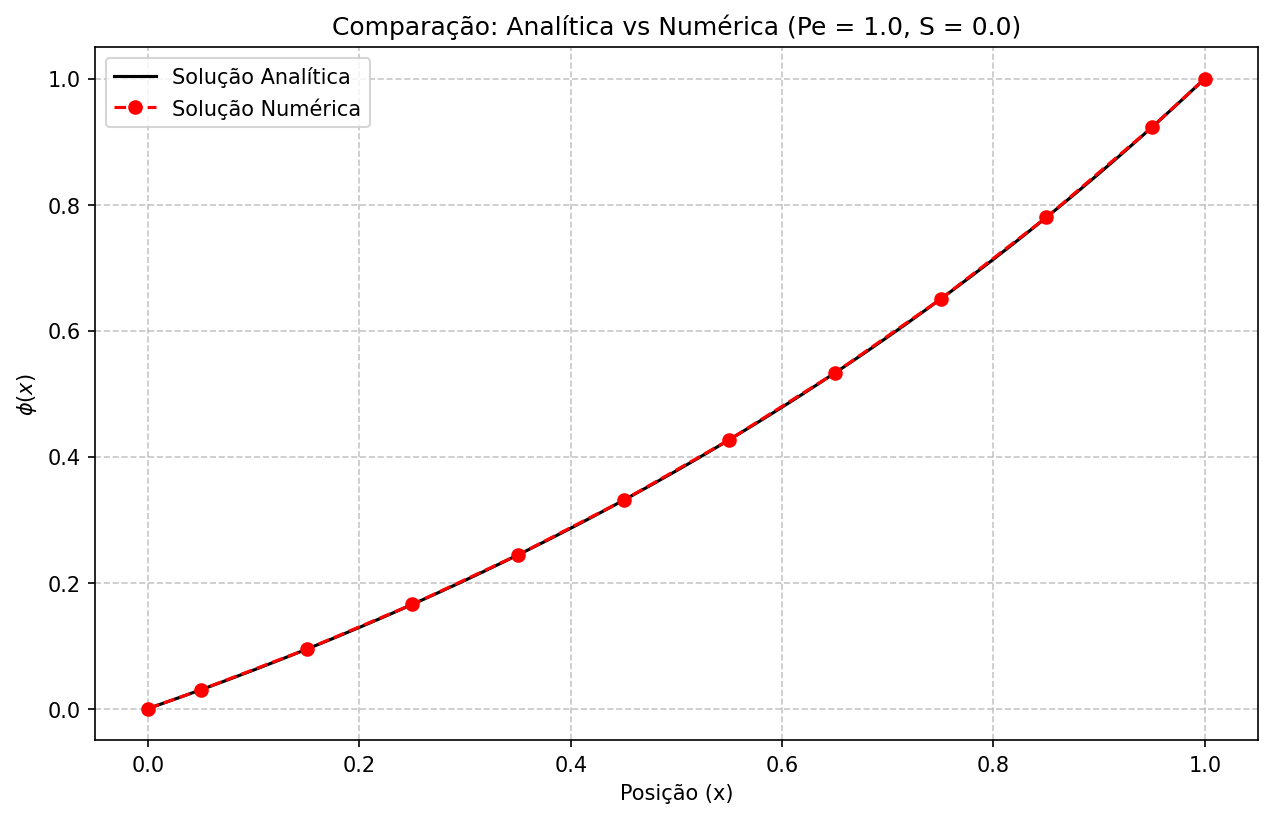

In [26]:
if __name__ == "__main__":
    solver = L8_Solver(u=1.0, S=0.0, nv=10)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

Esse gráfico é idêntico ao encontrado previamente para Pe = 1 e S = 0, ou seja, sem termo fonte. Assim, a eficácia da classe pode ser validade e podemos prosseguir para a obtenção de novos resultados.

#### Caso 2

- Velocidade = 10 m/s e S = 0 (sem termo fonte).

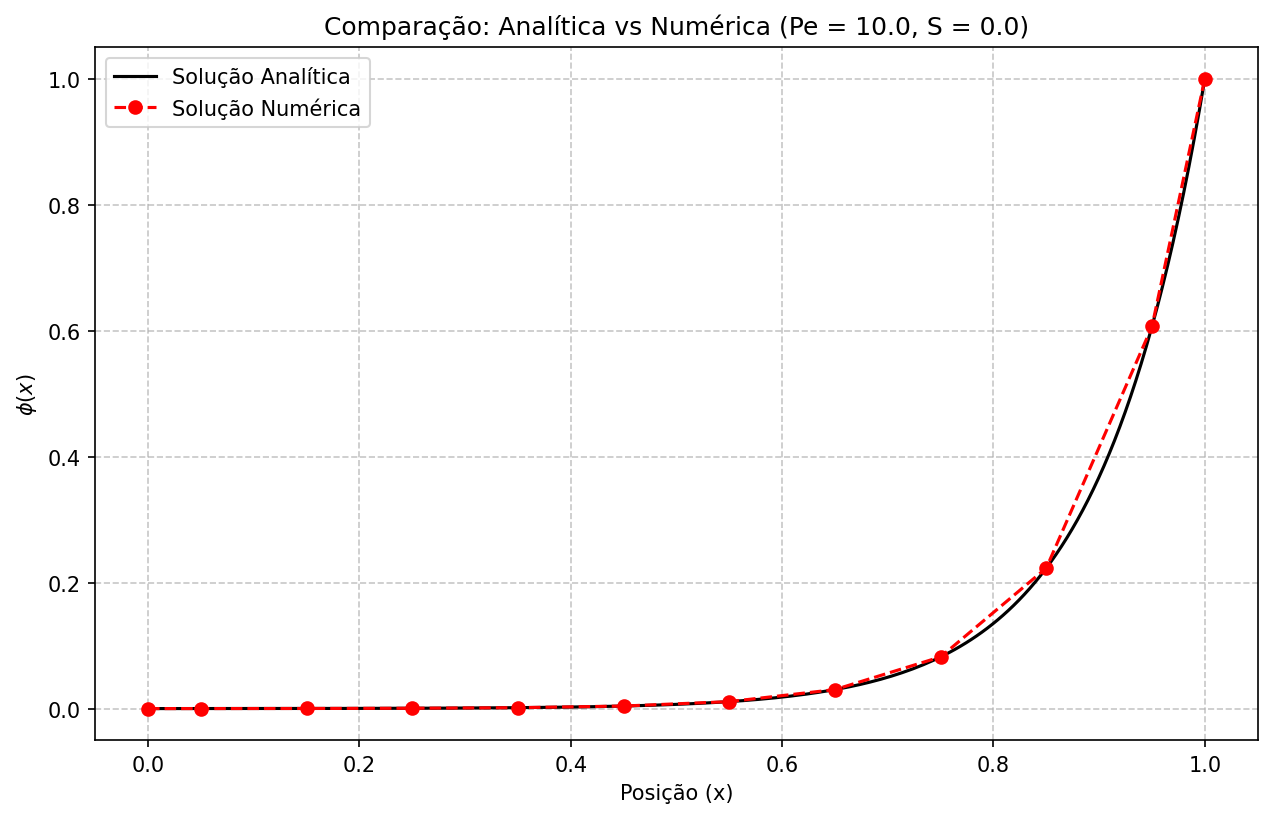

In [27]:
if __name__ == "__main__":
    solver = L8_Solver(u=10.0, S=0.0, nv=10)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

#### Caso 3

- Velocidade = 1 m/s e S = 5 W/m^3.

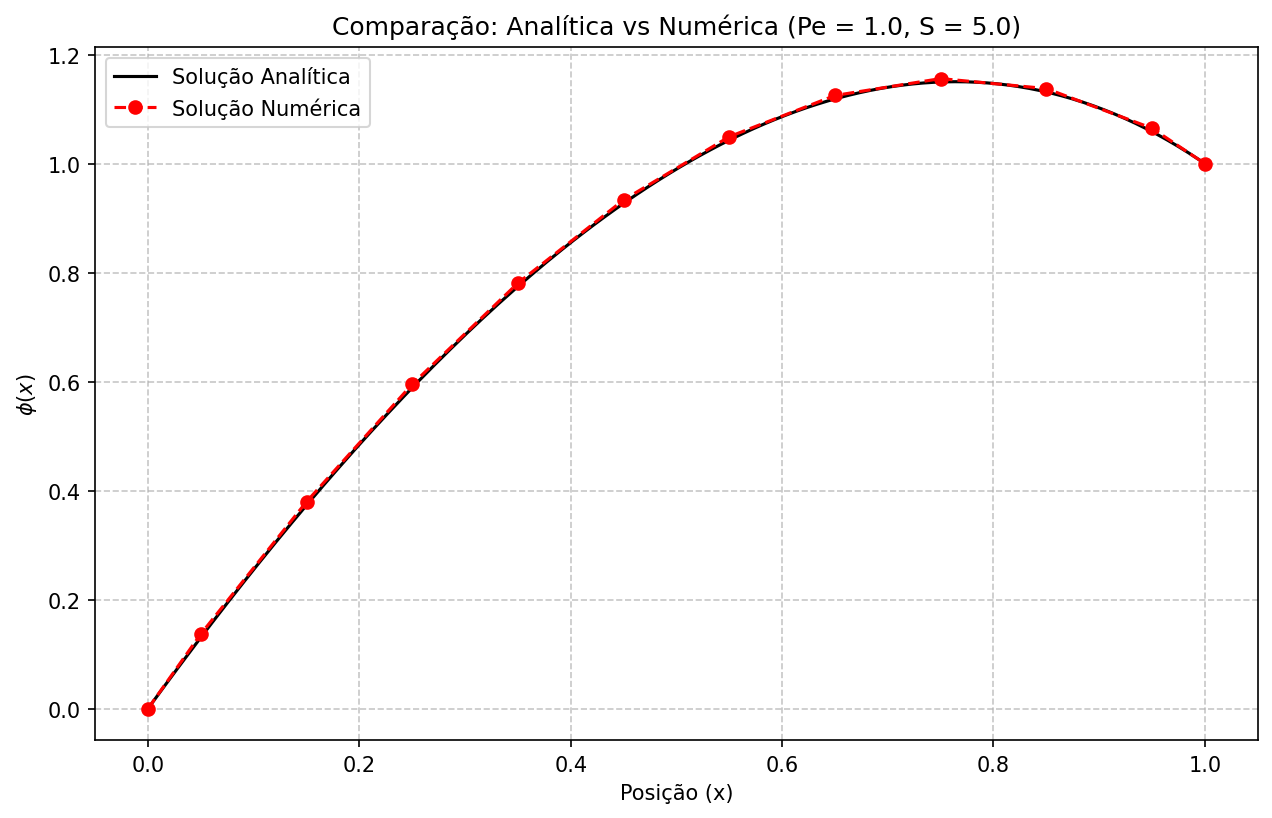

In [28]:
if __name__ == "__main__":
    solver = L8_Solver(u=1.0, S=5.0, nv=10)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

#### Caso 4

- Velocidade = 10 m/s e S = 5 W/m^3.

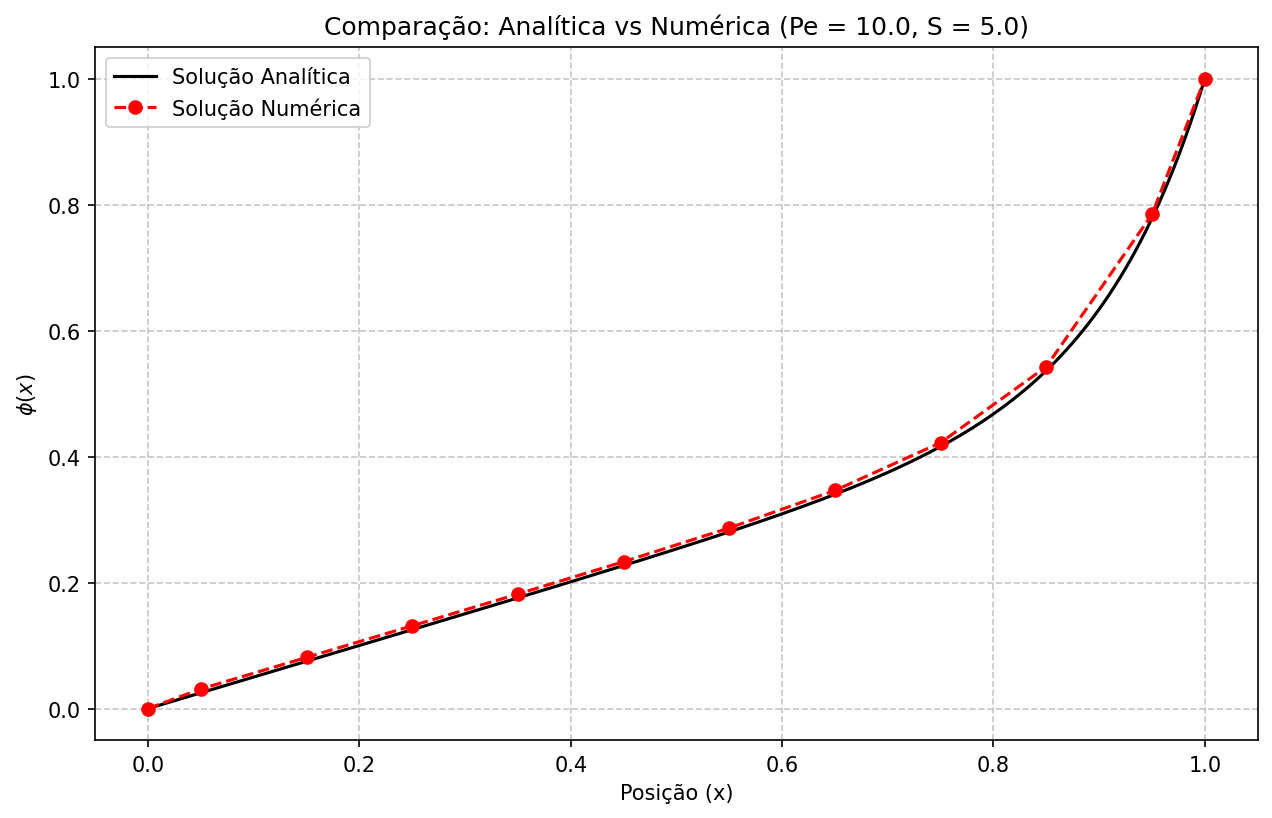

In [29]:
if __name__ == "__main__":
    solver = L8_Solver(u=10.0, S=5.0, nv=10)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

#### Caso 5

- Velocidade = 5 m/s e S = 5 W/m^3.

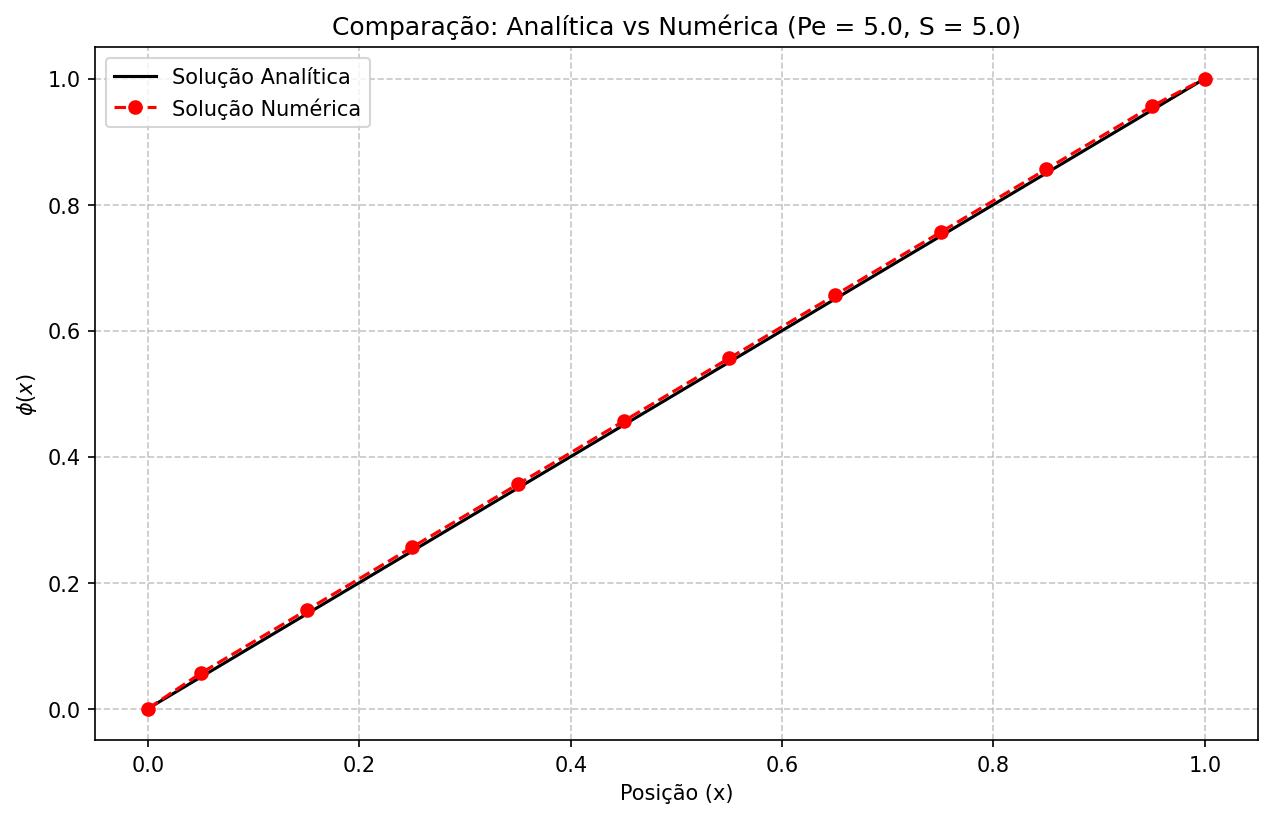

In [30]:
if __name__ == "__main__":
    solver = L8_Solver(u=5.0, S=5.0, nv=10)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

Nesta etapa do trabalho, torna-se pertinente discutir as diferenças observadas entre os perfis obtidos nos \textbf{casos 3, 4 e 5}, uma vez que todos incluem a presença de termo-fonte, mas resultam em curvas significativamente distintas.

Essas diferenças estão associadas à relação entre os efeitos convectivos e a intensidade do termo-fonte, a qual é influenciada pela velocidade do escoamento e, consequentemente, pelo número de Péclet.

No **caso 3**, com $Pe = 1{,}0$, a convecção é relativamente fraca e a difusão possui papel relevante no transporte. Nessas condições, o termo-fonte consegue promover o acúmulo da grandeza transportada $(\phi)$ ao longo do domínio, resultando em um perfil com pico pronunciado, que pode inclusive ultrapassar o valor unitário.

No **caso 4**, com $Pe = 10{,}0$, a convecção torna-se dominante. O escoamento passa a remover rapidamente a grandeza gerada pelo termo-fonte, transportando-a em direção à saída do domínio. Como consequência, o pico observado no caso anterior é suprimido, e o perfil assume uma forma assimétrica, com elevação mais acentuada apenas nas proximidades da saída.

Por fim, no **caso 5**, o termo-fonte é proporcional à velocidade do escoamento. Nessa configuração, o fluido adquire a grandeza transportada a uma taxa aproximadamente constante por unidade de comprimento, uma vez que a geração cresce na mesma proporção que o transporte convectivo. Como resultado, obtém-se um perfil aproximadamente linear para a variável $\phi$.


#### Caso 6

Aqui foi proposta uma análise de sensibilidade do caso 4, com o intuito de aproximar a solução numérica da analítica. Para tanto, dobrou-se o número de volumes de controle, ou seja, nesta simulação foram 20 volumes.

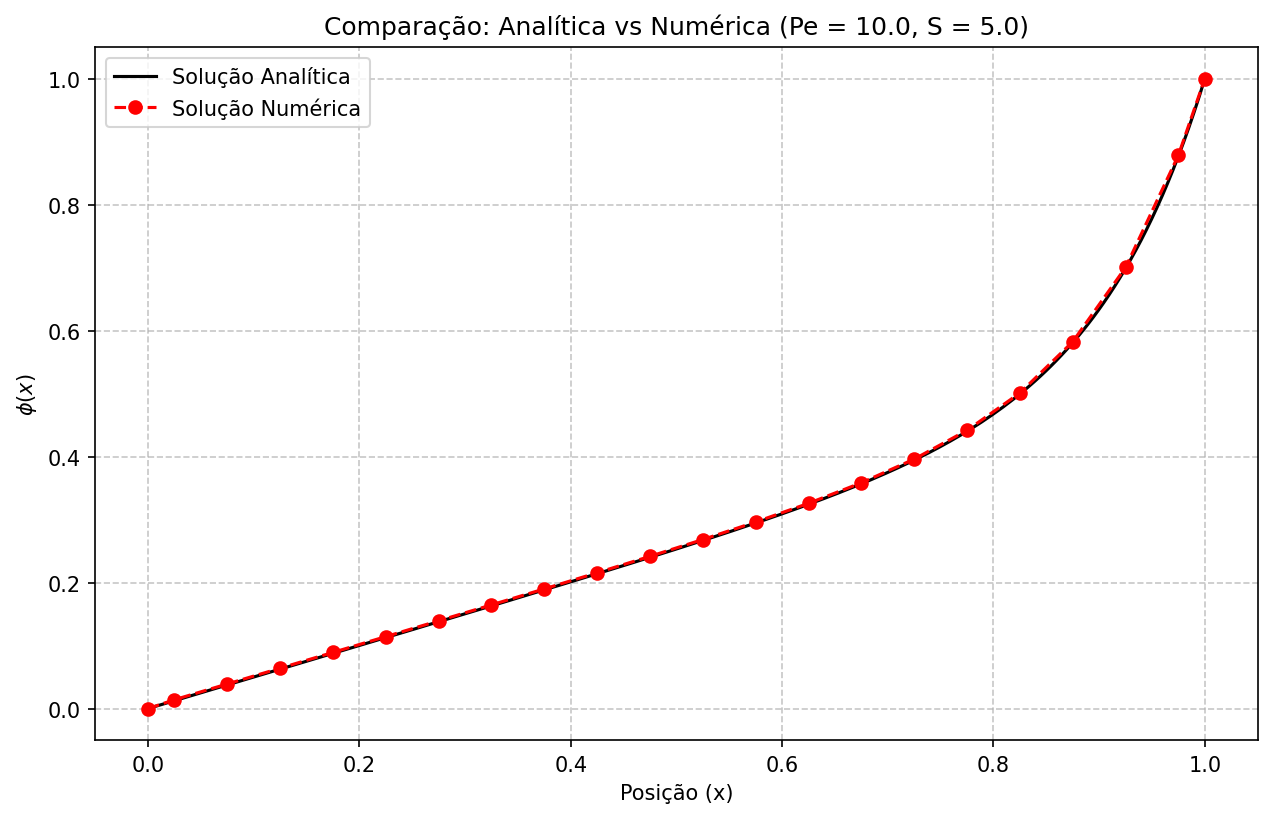

In [31]:
if __name__ == "__main__":
    solver = L8_Solver(u=10.0, S=5.0, nv=20)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

#### Caso 7 - Alta convecção

- Velocidade = 100 m/s e S = 10 W/m^3.

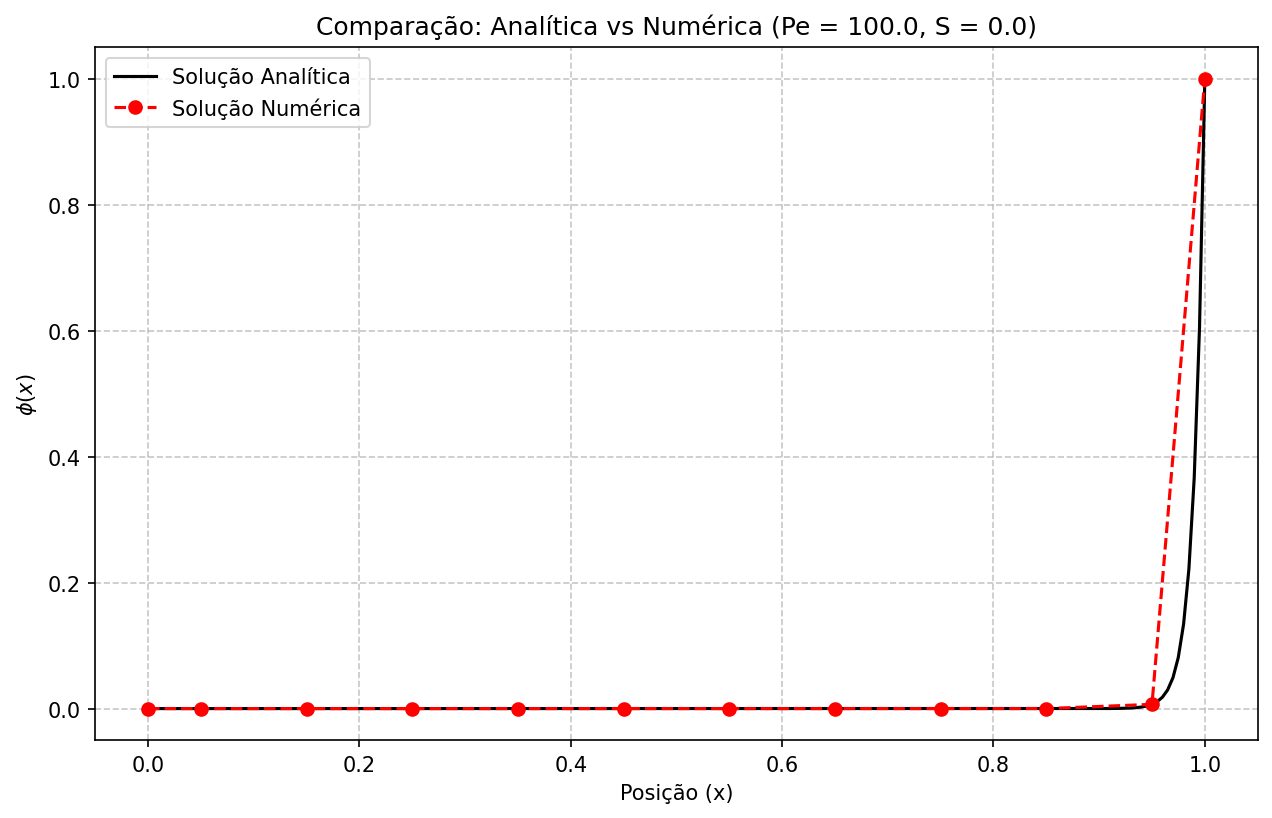

In [32]:
if __name__ == "__main__":
    solver = L8_Solver(u=100.0, S=0.0, nv=10)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

#### Caso 8 - Alta convecção com 100 volumes

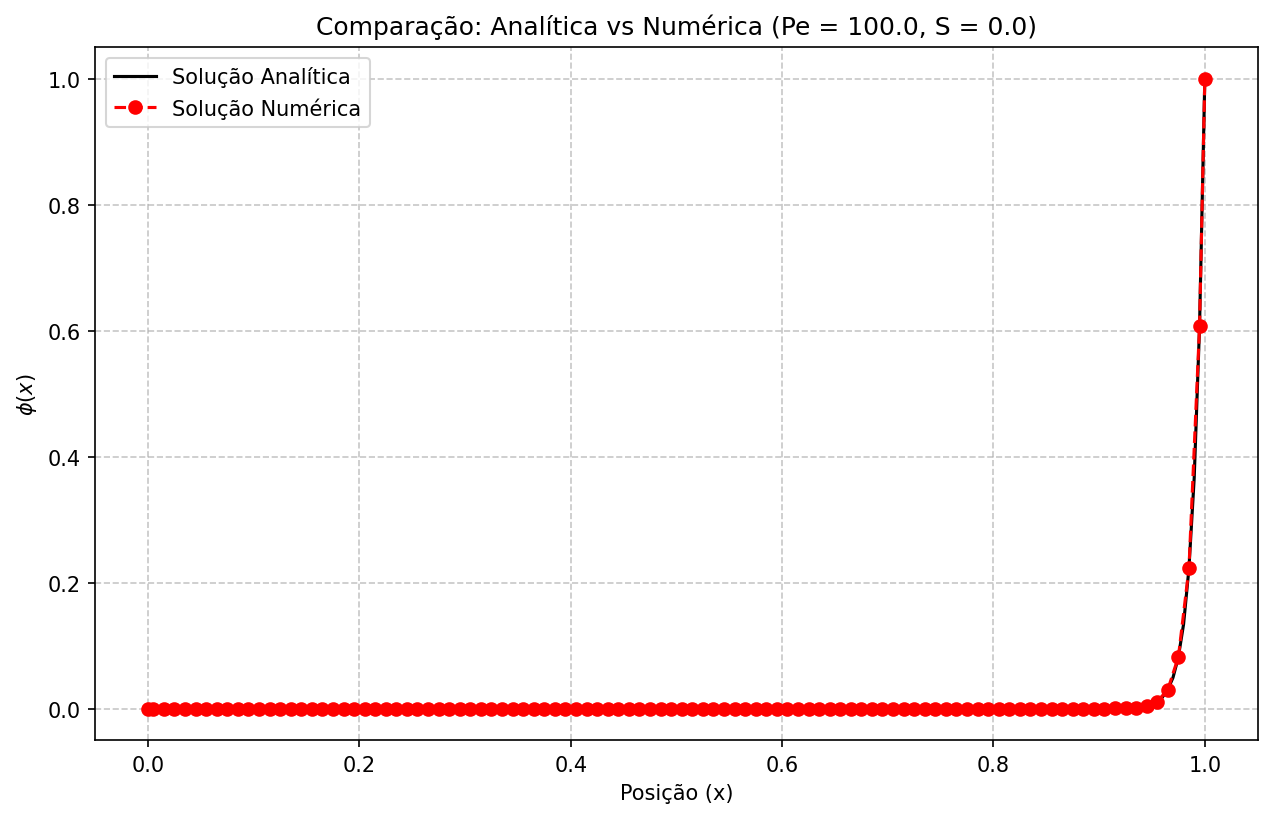

In [33]:
if __name__ == "__main__":
    solver = L8_Solver(u=100.0, S=0.0, nv=100)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

Os resultados dos gráficos dos **casos 7 e 8** revelam que valores mais altos da velocidade, e, consequentemente, do número de Péclet, aumentam o tempo de residência de $\phi_0$ ao longo de $x$.

#### Caso 9 - Sumidouro

Neste caso, propôs-se um termo-fonte negativo, ou seja, é como se a grandeza estivesse sendo consumida.

- Velocidade = 1 m/s e S = -10 W/m^3.

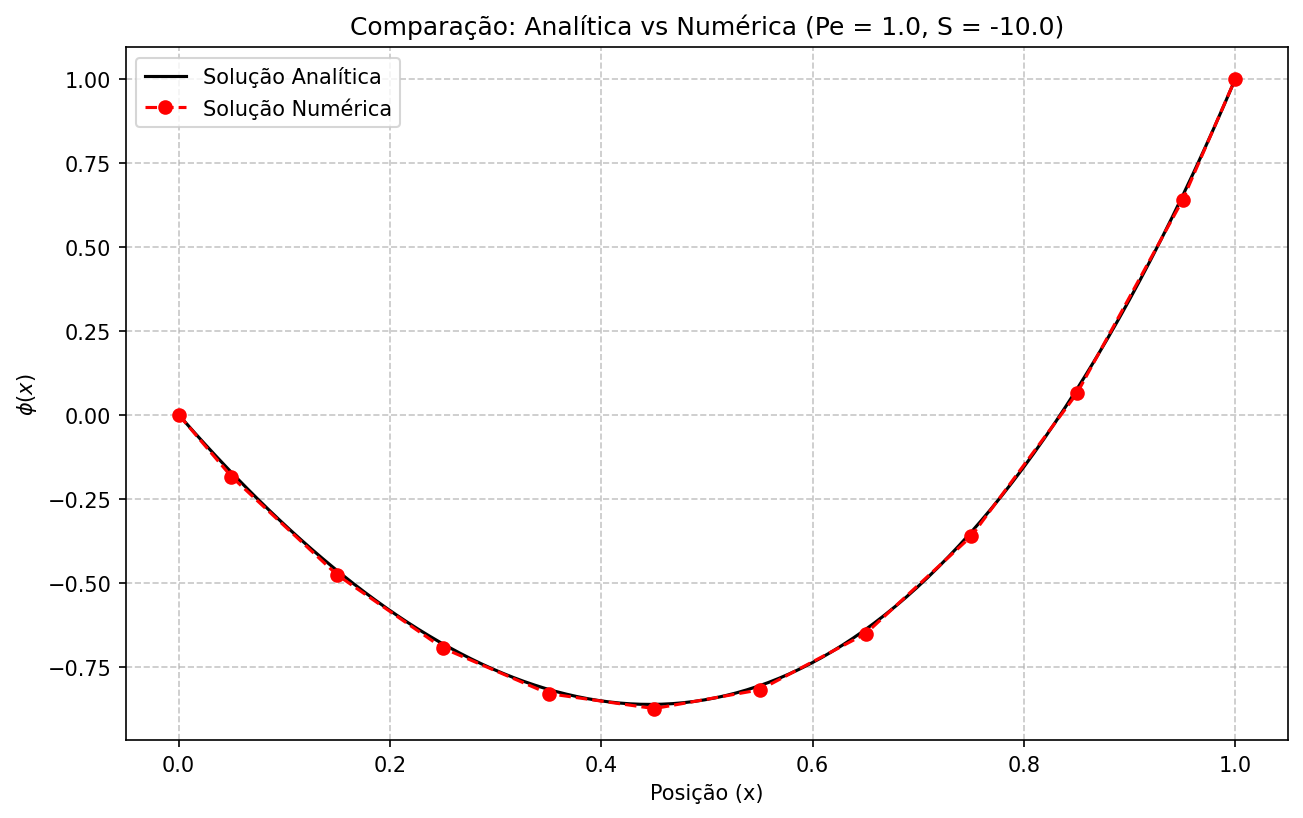

In [34]:
if __name__ == "__main__":
    solver = L8_Solver(u=1.0, S= -10.0, nv=10)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

#### Caso 10 - Convecção reversa

Agora temos um caso de fluxo negativo, ou seja, com $u<0$.

- Velocidade = - 1 m/s e S = 0.

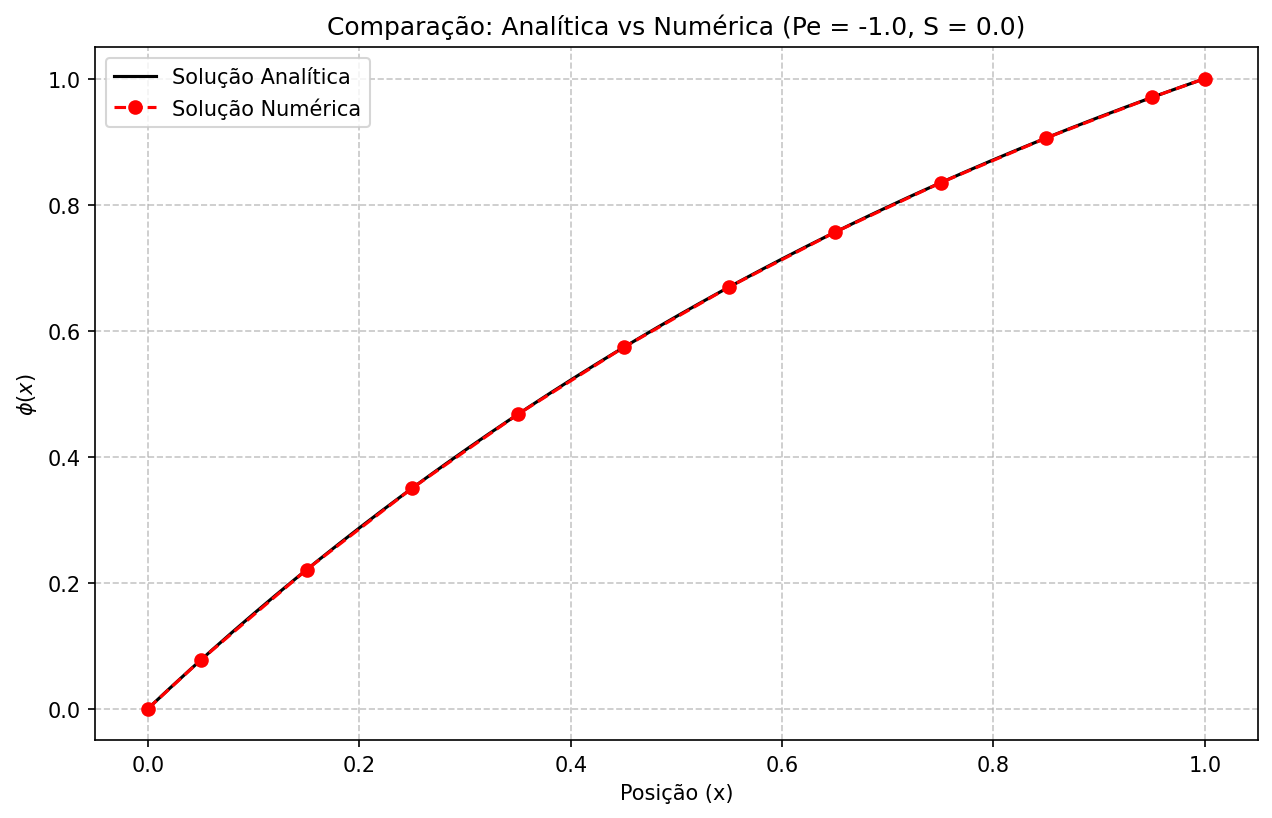

In [35]:
if __name__ == "__main__":
    solver = L8_Solver(u=-1.0, S= 0.0, nv=10)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

#### Caso 11 - Sumidouro e Fluxo Negativo

- Velocidade = -10 m/s e S = - 10 W/m^3.

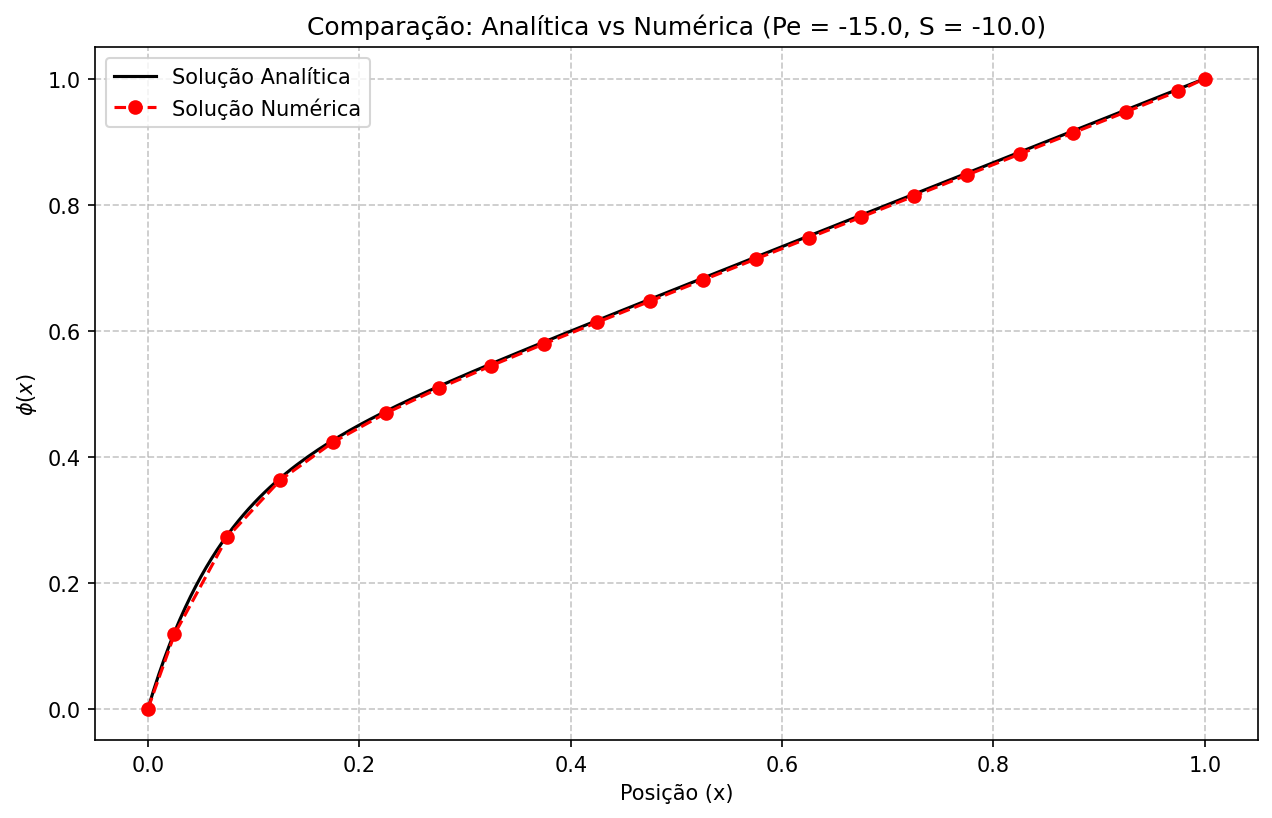

In [36]:
if __name__ == "__main__":
    solver = L8_Solver(u=-15.0, S= -10.0, nv=20)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

#### Caso 12 - Mudando as condições de contorno

- Velocidade = 1 m/s, S = 0, $\phi_0 = 1.0$ e $\phi_L = 0.0$.

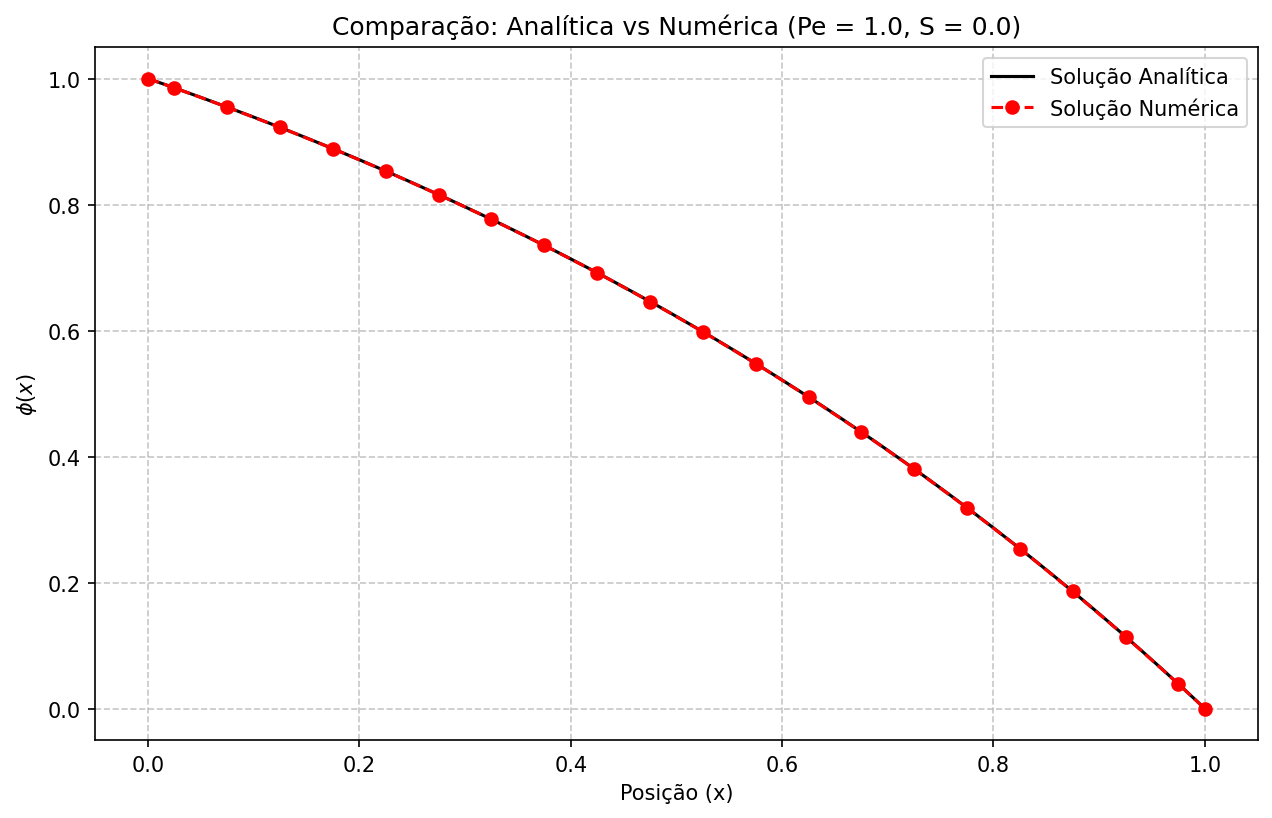

In [37]:
if __name__ == "__main__":
    solver = L8_Solver(u=1.0, S= 0.0, phi_0=1.0, phi_L=0.0, nv=20)
    solver.solve_analitica()
    solver.solve_numerica()
    solver.plot_comparison()

### Comentários Finais

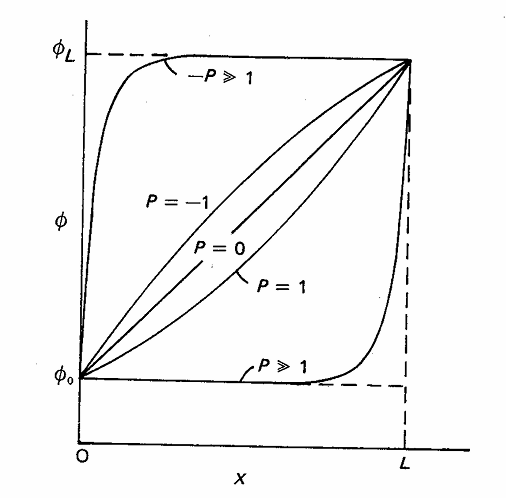

In [38]:
Image('fig5.3.png',width=400)

A figura acima é a 5.3 do livro *Numerical heat transfer and fluid flow*, do Patankar. Ela descreve a solução exata para o problema unidimensional de convecção-difusão para diferentes números de Péclet, e, neste trabalho é possível perceber que que os resultados do **caso 1 (Pe = 1)**, **caso 2 (Pe = 10 >> 1)** e **caso 10 (Pe = -1)** estão em concordância com o que foi apresentado nesta figura, validando a metodologia empregada. 

### Conclusão

Os resultados numéricos obtidos apresentam excelente concordância com a solução analítica, o que era esperado, uma vez que o método de discretização baseado no Esquema Exponencial deriva diretamente da solução analítica da equação de transporte unidimensional. Dessa forma, conforme discutido por Patankar (1980), esse esquema fornece uma solução exata para quaisquer valores do número de Péclet e para qualquer número de pontos na malha computacional, no contexto unidimensional e na ausência de termos adicionais que comprometam essa equivalência.

Contudo, apesar desse comportamento altamente desejável do ponto de vista numérico, o Esquema Exponencial não é amplamente empregado em aplicações práticas. Isso se deve, principalmente, a dois fatores: (i) o custo computacional associado ao cálculo de funções exponenciais e (ii) o fato de que o esquema deixa de ser exato em situações mais complexas, como problemas bidimensionais ou tridimensionais, presença de termos-fonte não nulos ou coeficientes variáveis. Nessas condições, o esforço computacional adicional requerido pelo cálculo das exponenciais não se justifica frente a esquemas alternativos que oferecem melhor compromisso entre precisão e custo computacional (PATANKAR, 1980).


### Referências Bibliográficas

- PATANKAR, Suhas V. Numerical heat transfer and fluid flow. New York: Hemisphere Publishing Corporation, 1980.